# Prévoir un Y quanti (regressor) => linéaire

## Table des matières

1. [Arbre de décision](#add)
2. [Forêt](#forest)
3. [SVR](#svr)
4. [Gradient Boosting](#gboost)

# Arbre de décision <a class="anchor" id="add"></a>

In [39]:
# Commencer par importer le jeu de données : Utiliser **pandas** et la fonction **read_csv**

import pandas as pd
fish = pd.read_csv("Fish.csv", sep = ',') 

In [40]:
# Créer une colonne par espèce avec OUI / NON

fish = pd.get_dummies(fish)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [41]:
# Séparer X et Y dans deux datasets distincs

import numpy as np
y = fish['Width']
x = fish.iloc[:, np.r_[0:5, 6:13]] # toutes les colonnes sauf la prévision (5 et 13 exclus)

In [44]:
#- Pour le modèle utiliser la fonction **DecisionTreeRegressor** en fonction du type de vos données

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

modele_arbre = tree.DecisionTreeRegressor()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

modele_arbre.fit(x_train, y_train)

DecisionTreeRegressor()

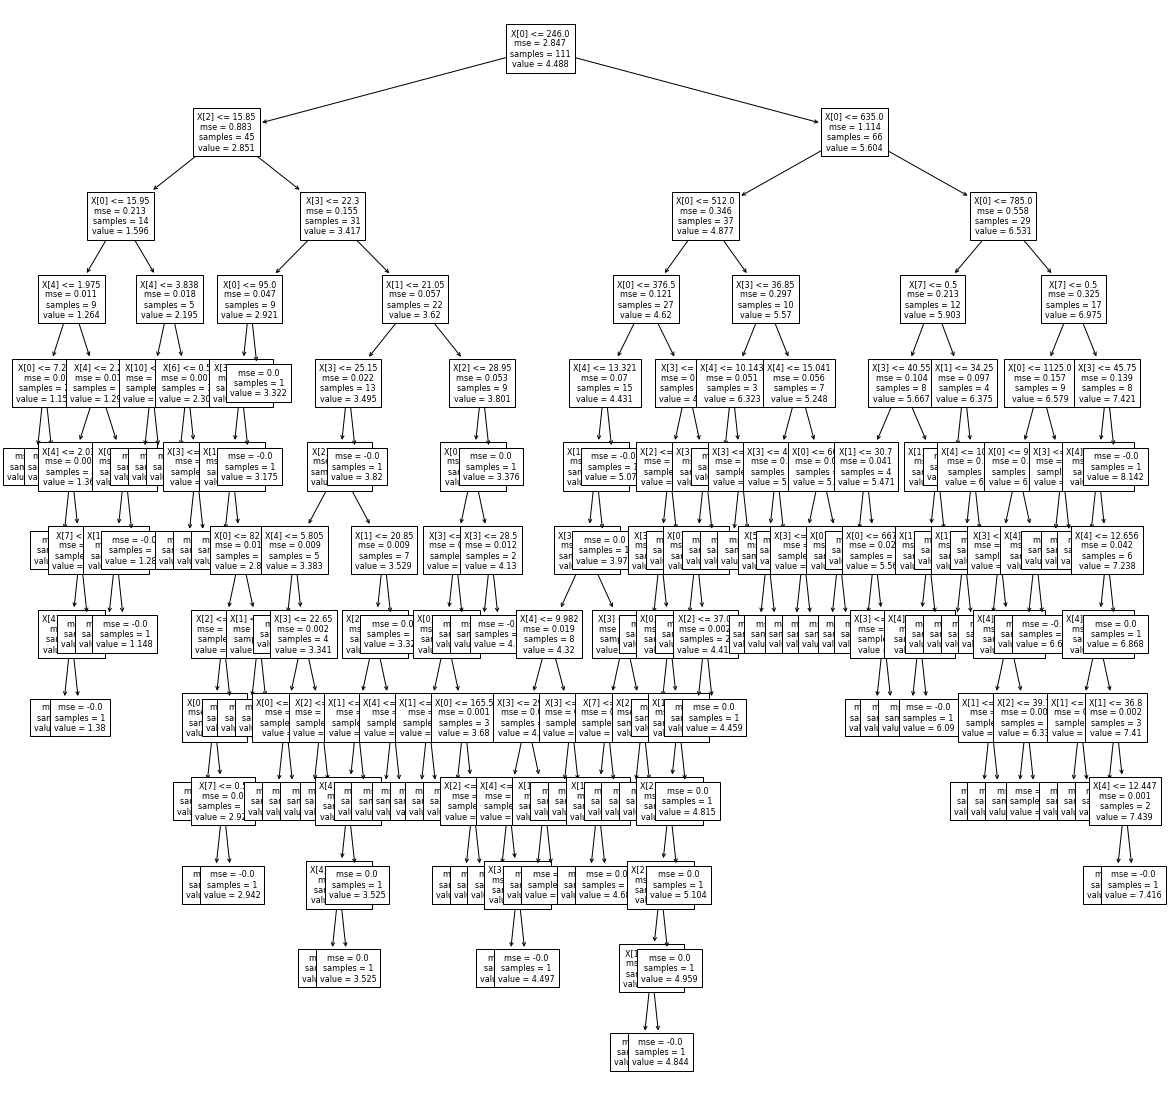

In [45]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20)) # set plot size (denoted in inches)
tree.plot_tree(modele_arbre, fontsize=8)
plt.show()

In [105]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = modele_arbre.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 0.17


In [106]:
help(modele_arbre.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.tree._classes.DecisionTreeRegressor instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting

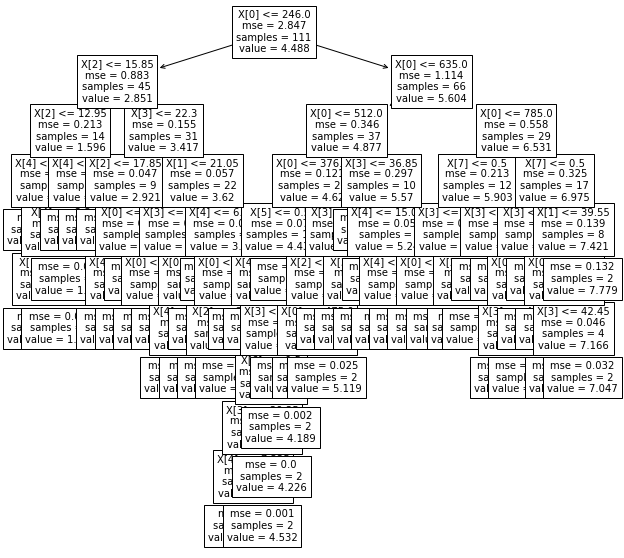

In [64]:
# Regarder l'aides de la fonction DecisionTreeRegressor, jouer avec les principaux paramètres et regarder l'influence de chacun sur les arbres et les scores.
    # Paramètres principaux :
    # max_depth
    # min_samples_split
    # min_samples_leaf

modele_arbre1 = tree.DecisionTreeRegressor(max_depth=10, min_samples_split=3, min_samples_leaf=2)
modele_arbre1.fit(x_train, y_train)
plt.figure(figsize=(10,10)) # set plot size (denoted in inches)
tree.plot_tree(modele_arbre1, fontsize=10)
plt.show()

In [107]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = modele_arbre1.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 0.15


# Forêts (pas de représentation possible) <a class="anchor" id="forest"></a>

In [67]:
# Remplacer les arbres de décision de l'exercices précédent par des forêts.
from sklearn.ensemble import RandomForestRegressor

forest_regr = RandomForestRegressor(n_estimators=10)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

forest_regr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [108]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = forest_regr.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 0.10


In [70]:
# Faire varier les paramètres en regardant l'aide de la fonction.
    # max_depth : La profondeur maximale de l'arbre. Si None, les nœuds sont développés jusqu'à ce que toutes les feuilles soient pures ou jusqu'à ce que toutes les 
        #feuilles contiennent moins que les échantillons min_samples_split.
    # n_estimators : The number of trees in the forest.
    # criterion : mse, mae pour RandomForestRegressor gini, entropy pour RandomForestClassifior.
    # min_samples_split : Le nombre minimum d'individus requis pour diviser un nœud interne.

from sklearn.ensemble import RandomForestRegressor
forest_regr1 = RandomForestRegressor(n_estimators=10, max_depth=5, criterion="mae", min_samples_split=4)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

forest_regr1.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=5, min_samples_split=4,
                      n_estimators=10)

In [109]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = forest_regr1.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 0.09


# SVR (pas de représentation possible) <a class="anchor" id="svr"></a>

In [84]:
# Exercice même chose que les forêts mais utiliser from sklearn.svm import SVR.

from sklearn import svm
fish_svm = svm.SVR()


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_svm.fit(x_train, y_train)

SVR()

In [110]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = fish_svm.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 2.97


In [92]:
# Faire varier :
    # kernel : Spécifie le type de noyau à utiliser dans l'algorithme. Il doit s’agir de "linear", "poly", "rbf", "sigmoid", "precomputed" ou fonction appelable.
    # degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

fish_svm1 = svm.SVR(kernel="linear", degree=3) 


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_svm1.fit(x_train, y_train)

SVR(kernel='linear')

In [97]:
# GridSearchCV pour trouver les meilleurs paramètres

from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear', 'poly'], 'degree': np.arange(1, 2)}

grid = GridSearchCV(svm.SVR(), param_grid, cv = 5) # cv = cross validation

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': array([1]), 'kernel': ['linear', 'poly']})

In [99]:
grid.best_score_

0.9546684630291662

In [100]:
grid.best_params_

{'degree': 1, 'kernel': 'linear'}

In [101]:
# Sauvegarde du modèle et affichage du score sur les données de test
model = grid.best_estimator_
model.score(x_test, y_test)

0.9430578165143955

# Gradient Boosting <a class="anchor" id="gboost"></a>

In [114]:
# Exercice même chose que les forêts mais utiliser from sklearn.ensemble import GradientBoostingRegressor.

from sklearn.ensemble import GradientBoostingRegressor
fish_grad = GradientBoostingRegressor()


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_grad.fit(x_train, y_train)

GradientBoostingRegressor()

In [115]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = fish_grad.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

RMSE: 0.13


In [118]:
# Faire varier :
    # loss ls, lad, huber, quantile.
    # learning_rate le taux d'apprentissage réduit la contribution de chaque arbre par learning_rate. Il y a un compromis 
    # entre learning_rate et n_estimators.
    # n_estimators Le nombre d'étapes de boost à effectuer. L'amplification du gradient est assez robuste à sur-ajustée, 
        # donc un grand nombre entraîne généralement de meilleures performances.
    # subsample La fraction d'échantillons à utiliser pour adapter les apprenants de base individuels. Si elle est inférieure 
        # à 1,0, cela entraîne un renforcement du gradient stochastique.
    # criterion friedman_mse, mse, mae. La fonction pour mesurer la qualité d'un split. Les critères pris en charge 
        # sont «friedman_mse» pour l'erreur quadratique moyenne avec un score d'amélioration de Friedman, «mse» pour l'erreur 
        # quadratique moyenne et «mae» pour l'erreur absolue moyenne. La valeur par défaut de "friedman_mse" est généralement 
        # la meilleure car elle peut fournir une meilleure approximation dans certains cas.
        
        
from sklearn.ensemble import GradientBoostingClassifier
fish_grad1 = GradientBoostingClassifier(loss= "deviance", learning_rate=0.9, n_estimators=100, subsample=0.9, 
                                      criterion="friedman_mse")


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101) 

fish_grad1.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [119]:
# Calcul du RMSE:
    
from sklearn.metrics import mean_squared_error

predictions = fish_grad.predict(x_test)
print('RMSE: %.2f'
      % mean_squared_error(y_test, predictions))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'estimators_'

In [79]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special